<a href="https://colab.research.google.com/github/rizinahammed/ict_assingments/blob/main/preprocessing_casestudy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Imports and load dataset


In [168]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder, LabelEncoder

In [169]:
house_pricing = pd.read_csv("House_Pricing.csv")

In [170]:
house_pricing.describe()

,ID,Sale Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),Renovated Year,Zipcode,Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft)
count,2.161300e+04,2.160900e+04,21613.000000,21609.000000,21604.000000,2.160400e+04,21613.000000,21613.000000,21610.000000,21613.000000,21613.000000,21613.000000,21612.000000,21612.000000,21612.000000,21612.000000,21613.000000
mean,4.580302e+09,5.401984e+05,3.370842,2.114732,2079.931772,1.510776e+04,1.494309,7.623467,1788.344193,291.509045,46.994864,84.402258,98077.937766,47.560048,-122.213892,1986.538914,12768.455652
std,2.876566e+09,3.673890e+05,0.930062,0.770138,918.487597,4.142827e+04,0.539989,1.105439,827.982604,442.575043,29.373411,401.679240,53.505425,0.138565,0.140830,685.404255,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,1.000000,290.000000,0.000000,3.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1429.250000,5.040000e+03,1.000000,7.000000,1190.000000,0.000000,21.000000,0.000000,98033.000000,47.470975,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.617500e+03,1.500000,7.000000,1560.000000,0.000000,43.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068825e+04,2.000000,8.000000,2210.000000,560.000000,67.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,10.000000,9410.000000,4820.000000,118.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [171]:
house_pricing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   ID                                         21613 non-null  int64  
 1   Date House was Sold                        21613 non-null  object 
 2   Sale Price                                 21609 non-null  float64
 3   No of Bedrooms                             21613 non-null  int64  
 4   No of Bathrooms                            21609 non-null  float64
 5   Flat Area (in Sqft)                        21604 non-null  float64
 6   Lot Area (in Sqft)                         21604 non-null  float64
 7   No of Floors                               21613 non-null  float64
 8   Waterfront View                            21613 non-null  object 
 9   No of Times Visited                        2124 non-null   object 
 10  Condition of the House

In [172]:
house_pricing.head()

,ID,Date House was Sold,Sale Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Waterfront View,No of Times Visited,...,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),Renovated Year,Zipcode,Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft)
0,7129300520,14 October 2017,221900.0,3,1.00,1180.0,5650.0,1.0,No,NaN,...,7,1180.0,0,63,0,98178.0,47.5112,-122.257,1340.0,5650
1,6414100192,14 December 2017,538000.0,3,2.25,2570.0,7242.0,2.0,No,NaN,...,7,2170.0,400,67,1991,98125.0,47.7210,-122.319,1690.0,7639
2,5631500400,15 February 2016,180000.0,2,1.00,770.0,10000.0,1.0,No,NaN,...,6,770.0,0,85,0,98028.0,47.7379,-122.233,2720.0,8062
3,2487200875,14 December 2017,604000.0,4,3.00,1960.0,5000.0,1.0,No,NaN,...,7,1050.0,910,53,0,98136.0,47.5208,-122.393,1360.0,5000
4,1954400510,15 February 2016,510000.0,3,2.00,1680.0,8080.0,1.0,No,NaN,...,8,1680.0,0,31,0,98074.0,47.6168,-122.045,1800.0,7503


# Remove duplicates rows

In [173]:
house_pricing = house_pricing.drop_duplicates()

# Handle missing values

In [174]:
house_pricing.isna().sum()

,0
ID,0
Date House was Sold,0
Sale Price,4
No of Bedrooms,0
No of Bathrooms,4
Flat Area (in Sqft),9
Lot Area (in Sqft),9
No of Floors,0
Waterfront View,0
No of Times Visited,19489


In [175]:
house_pricing.drop(columns =['No of Times Visited'], inplace=True,axis = 1)

In [176]:
house_pricing.isna().sum()

,0
ID,0
Date House was Sold,0
Sale Price,4
No of Bedrooms,0
No of Bathrooms,4
Flat Area (in Sqft),9
Lot Area (in Sqft),9
No of Floors,0
Waterfront View,0
Condition of the House,0


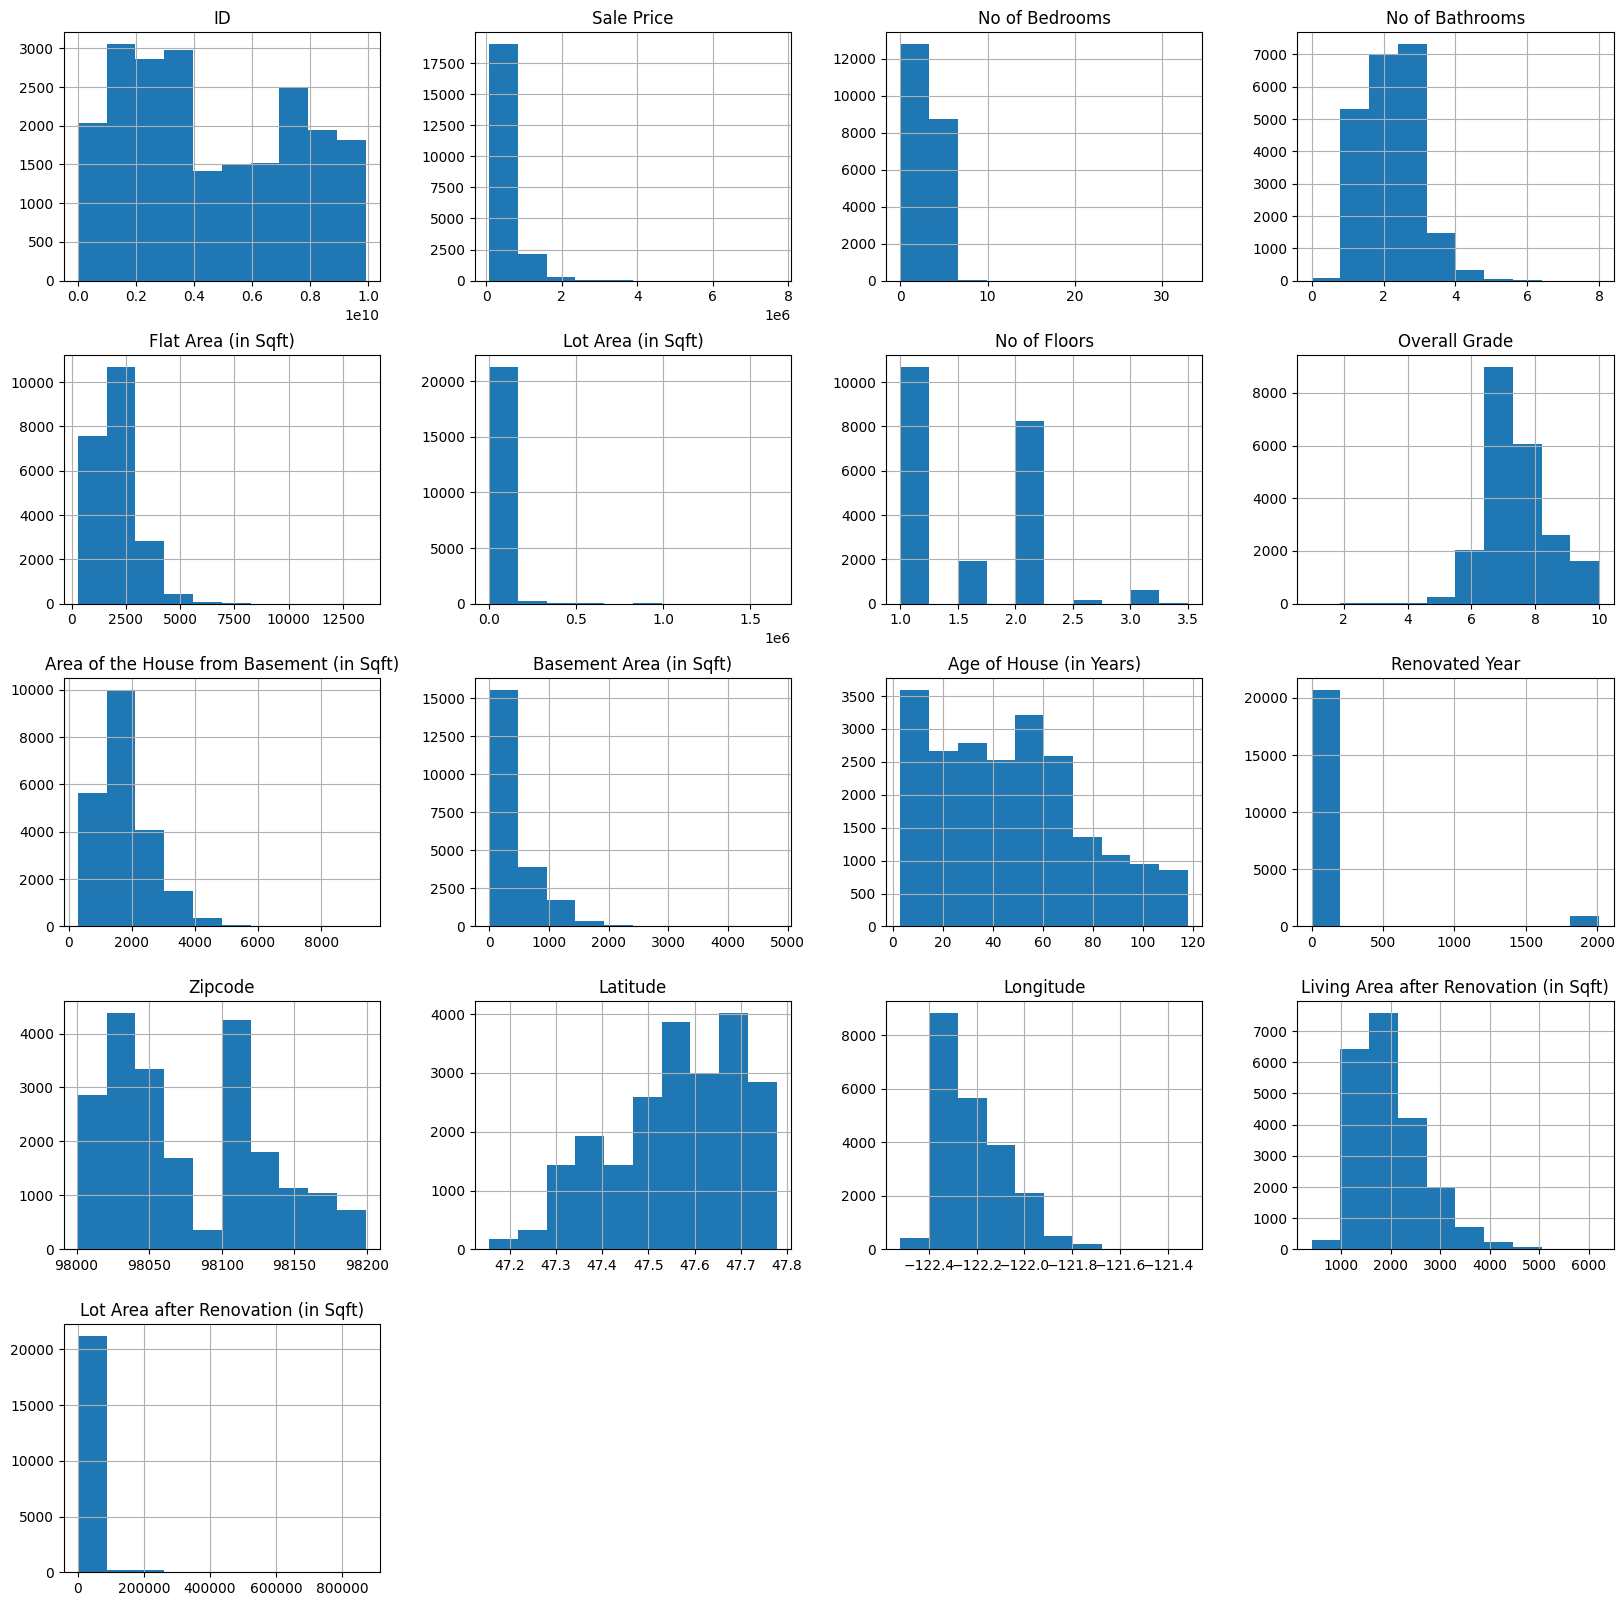

In [177]:
house_pricing.hist(figsize = (20, 20))
plt.show()


# filled with median for all numerical columns based on above plot

In [178]:
house_pricing['Sale Price'] = house_pricing['Sale Price'].fillna(house_pricing['Sale Price'].median())

In [179]:
house_pricing['No of Bathrooms'] = house_pricing['No of Bathrooms'].fillna(house_pricing['No of Bathrooms'].median())

In [180]:
house_pricing['Flat Area (in Sqft)'] = house_pricing['Flat Area (in Sqft)'].fillna(house_pricing['Flat Area (in Sqft)'].median())

In [181]:
house_pricing['Lot Area (in Sqft)'] = house_pricing['Lot Area (in Sqft)'].fillna(house_pricing['Lot Area (in Sqft)'].median())

In [182]:
house_pricing['Area of the House from Basement (in Sqft)'] = house_pricing['Area of the House from Basement (in Sqft)'].fillna(house_pricing['Area of the House from Basement (in Sqft)'].median())

In [183]:
house_pricing['Area of the House from Basement (in Sqft)'] = house_pricing['Area of the House from Basement (in Sqft)'].fillna(house_pricing['Area of the House from Basement (in Sqft)'].median())

#Rows are dropped with one missing value for 'Zipcode','Latitude','Longitude','Living Area after Renovation (in Sqft)

In [184]:
house_pricing.dropna(subset=['Zipcode','Latitude','Longitude','Living Area after Renovation (in Sqft)'], inplace=True)

In [185]:
house_pricing.isna().sum()

,0
ID,0
Date House was Sold,0
Sale Price,0
No of Bedrooms,0
No of Bathrooms,0
Flat Area (in Sqft),0
Lot Area (in Sqft),0
No of Floors,0
Waterfront View,0
Condition of the House,0



# Outlier removal (IQR, numeric only) by checking

Check which columns actually have outliers (IQR rule)

In [186]:
house_pricing_clean = house_pricing.copy()   # your cleaned dataset

num_cols = house_pricing_clean.select_dtypes(include=['int64', 'float64']).columns

outlier_info = {}

for col in num_cols:
    Q1 = house_pricing_clean[col].quantile(0.25)
    Q3 = house_pricing_clean[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    # boolean Series: True where value is outlier
    outliers_col = (house_pricing_clean[col] < lower) | (house_pricing_clean[col] > upper)

    outlier_info[col] = outliers_col.sum()  # how many outliers in this column

outlier_info


{'ID': np.int64(0),
 'Sale Price': np.int64(1159),
 'No of Bedrooms': np.int64(546),
 'No of Bathrooms': np.int64(571),
 'Flat Area (in Sqft)': np.int64(572),
 'Lot Area (in Sqft)': np.int64(2423),
 'No of Floors': np.int64(0),
 'Overall Grade': np.int64(1911),
 'Area of the House from Basement (in Sqft)': np.int64(610),
 'Basement Area (in Sqft)': np.int64(496),
 'Age of House (in Years)': np.int64(0),
 'Renovated Year': np.int64(913),
 'Zipcode': np.int64(0),
 'Latitude': np.int64(2),
 'Longitude': np.int64(256),
 'Living Area after Renovation (in Sqft)': np.int64(544),
 'Lot Area after Renovation (in Sqft)': np.int64(2193)}

#Remove rows only where outliers exist (multiple columns)**bold text**

In [187]:
# choose only columns that have outliers
cols_with_outliers = [c for c, n in outlier_info.items() if n > 0]

numeric_house_pricing = house_pricing_clean[cols_with_outliers]
numeric_house_pricing


,Sale Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Renovated Year,Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft)
0,221900.0,3,1.00,1180.0,5650.0,7,1180.0,0,0,47.5112,-122.257,1340.0,5650
1,538000.0,3,2.25,2570.0,7242.0,7,2170.0,400,1991,47.7210,-122.319,1690.0,7639
2,180000.0,2,1.00,770.0,10000.0,6,770.0,0,0,47.7379,-122.233,2720.0,8062
3,604000.0,4,3.00,1960.0,5000.0,7,1050.0,910,0,47.5208,-122.393,1360.0,5000
4,510000.0,3,2.00,1680.0,8080.0,8,1680.0,0,0,47.6168,-122.045,1800.0,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,360000.0,3,2.50,1530.0,1131.0,8,1530.0,0,0,47.6993,-122.346,1530.0,1509
21609,400000.0,4,2.50,2310.0,5813.0,8,2310.0,0,0,47.5107,-122.362,1830.0,7200
21610,402101.0,2,0.75,1020.0,1350.0,7,1020.0,0,0,47.5944,-122.299,1020.0,2007
21611,400000.0,3,2.50,1600.0,2388.0,8,1600.0,0,0,47.5345,-122.069,1410.0,1287


In [188]:
Q1 = numeric_house_pricing.quantile(0.25)
Q3 = numeric_house_pricing.quantile(0.75)
IQR = Q3 - Q1

lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

house_pricing_clean[cols_with_outliers] = numeric_house_pricing.clip(lower=lower, upper=upper, axis=1)

Select numeric columns (including SalePrice if you want to consider its outliers too)

In [189]:
numeric_cols = house_pricing.select_dtypes(include=['int64', 'float64']).columns
numeric_house_pricing = house_pricing[numeric_cols]

Compute Q1, Q3, IQR for each numeric column

In [190]:
Q1 = numeric_house_pricing.quantile(0.25)
Q3 = numeric_house_pricing.quantile(0.75)
IQR = Q3 - Q1

Build mask: rows with NO outliers in any numeric column

In [191]:
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

mask = ~(
    (numeric_house_pricing < lower_bound) |
    (numeric_house_pricing > upper_bound)
).any(axis=1)


Apply mask to full **DataFrame**

In [192]:
house_pricing_no_outliers = house_pricing[mask].reset_index(drop=True)

# Scaling & Encoding

In [193]:
num_cols = house_pricing_no_outliers.select_dtypes(include=['int64', 'float64']).columns.tolist()
cat_cols = house_pricing_no_outliers.select_dtypes(include=['object']).columns.tolist()

# impute target (SalePrice) yet
target = 'Sale Price'
num_features = [c for c in num_cols if c != target]


Scaling numerical variables (excluding SalePrice)

In [194]:
scaler = StandardScaler()
house_pricing_no_outliers[num_features] = scaler.fit_transform(house_pricing_no_outliers[num_features])


Encoding categorical variables

In [195]:
# One-Hot for nominal
house_pricing_no_outliers = pd.get_dummies(house_pricing_no_outliers, columns=cat_cols, drop_first=True)

# Train-Test Split

In [196]:
y = house_pricing_no_outliers[target]
X = house_pricing_no_outliers.drop(columns=[target])

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42
)